# The value of Adaptation 
___

In this notebook I will show the proper formulation of an adaptation problem, 
and the difference with both the classic robustness analysis and the robustness 
decision making problem. I will also show the advantage of this formulation using an extremely simplified problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Consider the following problem: <br>
J. Objective function, that quantify the criteria for decision <br>
x. Decision variable <br>
u. Uncertainty <br>
We consider the case with deep uncertainty. i.e. we do not have $P(u)$, but only a possible range, $U$


An **analysis of robustness** would estimate how the optimal decision would perform for different values of u.
A similar approach can be found, among others, in *Kasprzyk JR, Nataraj S, Reed PM, Lempert RJ (2013) Many objective robust decision making for complex
environmental systems undergoing change. Environmental Modelling & Software:1–17. doi:10.1016/j.
envsoft.2012.007*

The mathematical formulation for the analysis of robustness problem would be: <br>
Find $x$ such that
$$ \underset{u}{EA} [ \min_x (J) ]$$

In which an Exploratory analysis EA is performed for the optimal decision, $\min_x$.
___

In **Robust Decision Making** , instead, one would look for the decision that perform well 
for a large set of value of the uncertain variable. A similar approach can be found, among others, in *Kwakkel, Jan H., Marjolijn Haasnoot, and Warren E. Walker. "Developing dynamic adaptive policy pathways: a computer-assisted approach for developing adaptive strategies for a deeply uncertain world." Climatic Change 132.3 (2015): 373-386.*

The mathematical formulation for the robust decision making problem would be: <br>
Find $x$ such that
$$   \min_x ( \underset{u}{EA}[ J ] ) $$

Differently from the formulation of analysis of robustness, the $EA$ is internal to the $\min$ component, meaning that the $EA$ is part of the process of solution-searching. The problem with RDB is that results depends on the range that is considered for the critical uncertainty, and the suggested decision is often over-conservative (particularly when the range of uncertainty is large). 

---

In **Dynamic Adaptive Policy**, instead, one consider the future capacity to adapt to change in $u$. 
I have not found a publication in which an optimization method is used for this purpose. 

The mathematical formulation for such the robust decision making problem would be: <br>
Find $X$ such that
$$   \min_X ( \underset{u}{EA}[ J ] ) $$

The difference with Robust Decision Making is that the decision space is larger, i.e. we explicitely include into 
the problem the future capacity to change the decision. The following examples illustrate the concept. 

In [23]:
u = np.arange(-1,0.5,0.05)

Consider the following cost function, that we want to minimize: 
$$ J = \frac {x^2} {(1-x)^{1.8}}  $$

The minimal value of $J$ is $0$, easy.
We have, however, a deep uncertainty about the real value of $x$. Such that:  <br>
$x = \hat{x} - u $ <br>
where $\hat{x}$ is the state of $x$ as we currently know it, but it may change (because of climate change, for example). 

The Analysis of robustness would identify the effects on $J$ if $u$ changes.  

In [16]:
EA_min_J = lambda u : (u**2) / (1-u)**1.8


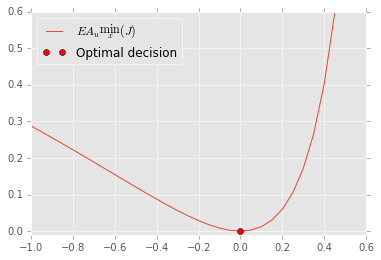

In [28]:
plt.plot(u,EA_min_J(u),label='${EA}_u \min_x (J)$') # 
plt.plot(0,0,'or',label='Optimal decision')
plt.ylim(-.01)
plt.legend(loc=2)

A Robustness analysis would analyze the consequence of the optimal  <br>
A Robust Decision Making would trade-off the risk of extremely high cost, in the example for 
$u$ larger than 0.4, with some loss of performance (Opt. decision for RDM has higher cost than Optimal Decision that does not consider possible change in $u$.  


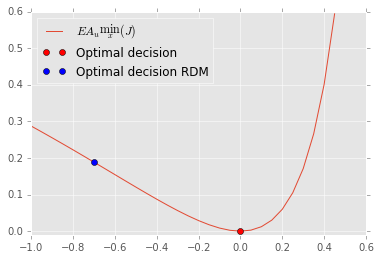

In [30]:
plt.plot(u,EA_min_J(u),label='${EA}_u \min_x (J)$') # 
plt.plot(0,0,'or',label='Optimal decision')
plt.plot(-0.7,EA_min_J(-0.7),'ob',label='Optimal decision RDM')
#plt.plot(0.7,0,'ob',label='Optimal decision RDM')
plt.ylim(-.01)
plt.legend(loc=2)

If u does not change, 0.2. If u increases, lower. 

Adaptive policy, instead, would go for a less risk

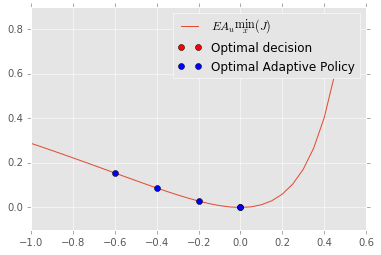

In [32]:
X = np.array([0,-0.2,-0.4,-0.6])
plt.plot(u,EA_min_J(u),label='${EA}_u \min_x (J)$') # 
plt.plot(0,0,'or',label='Optimal decision')
plt.plot(X,EA_min_J(X),'ob',label='Optimal Adaptive Policy')
#plt.plot(0.7,0,'ob',label='Optimal decision RDM')
plt.ylim([-.1,0.9])
plt.legend(loc=1)